<a href="https://colab.research.google.com/github/SteveTuttle/deep-learning-challenge/blob/main/deep_learning_nn2_SDT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns=['EIN', 'NAME'],inplace=True)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_count = application_df['APPLICATION_TYPE'].value_counts()
application_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace` -- using example output to determine cuttoff
application_types_to_replace = application_count[application_count < 200].index.tolist()

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts for binning
classification_count = application_df['CLASSIFICATION'].value_counts()
classification_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [7]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_count_filtered = classification_count[classification_count > 1]
classification_count_filtered

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [8]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace` -- using example output to determine cuttoff
classifications_to_replace = classification_count[classification_count < 1000].index.tolist()

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [9]:
# Review info for DataFrame
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   APPLICATION_TYPE        34299 non-null  object
 1   AFFILIATION             34299 non-null  object
 2   CLASSIFICATION          34299 non-null  object
 3   USE_CASE                34299 non-null  object
 4   ORGANIZATION            34299 non-null  object
 5   STATUS                  34299 non-null  int64 
 6   INCOME_AMT              34299 non-null  object
 7   SPECIAL_CONSIDERATIONS  34299 non-null  object
 8   ASK_AMT                 34299 non-null  int64 
 9   IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 2.6+ MB


In [10]:
# Convert categorical data to numeric with `pd.get_dummies`
# Selecting the categorical data columns
categorical_data = ['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE', 'ORGANIZATION', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS']

# Convert categorical columns to get_dummies variables
application_df = pd.get_dummies(application_df, columns=categorical_data)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [11]:
# Review updated DataFrame info after get_dummies
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   STATUS                        34299 non-null  int64
 1   ASK_AMT                       34299 non-null  int64
 2   IS_SUCCESSFUL                 34299 non-null  int64
 3   APPLICATION_TYPE_Other        34299 non-null  uint8
 4   APPLICATION_TYPE_T10          34299 non-null  uint8
 5   APPLICATION_TYPE_T19          34299 non-null  uint8
 6   APPLICATION_TYPE_T3           34299 non-null  uint8
 7   APPLICATION_TYPE_T4           34299 non-null  uint8
 8   APPLICATION_TYPE_T5           34299 non-null  uint8
 9   APPLICATION_TYPE_T6           34299 non-null  uint8
 10  APPLICATION_TYPE_T7           34299 non-null  uint8
 11  APPLICATION_TYPE_T8           34299 non-null  uint8
 12  AFFILIATION_CompanySponsored  34299 non-null  uint8
 13  AFFILIATION_Family/Parent     3

In [12]:
# Split our preprocessed data into our features and target arrays
y = application_df['IS_SUCCESSFUL'].values
X = application_df.drop(['IS_SUCCESSFUL'], axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

In [13]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [14]:
# Determining number of features in X for nn_model
len(X_train[0])

43

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features_count = len(X_train[0])
hidden_nodes_1stlayer = (input_features_count * 3)
hidden_nodes_2ndlayer = (input_features_count * 0.5)
hidden_nodes_3rdlayer = (input_features_count * 0.3)

nn_model2 = tf.keras.models.Sequential()

# First hidden layer
nn_model2.add(tf.keras.layers.Dense(units=hidden_nodes_1stlayer, activation='relu', input_dim=input_features_count))

# Second hidden layer
nn_model2.add(tf.keras.layers.Dense(units=hidden_nodes_2ndlayer, activation='relu'))

# Third hidden layer
nn_model2.add(tf.keras.layers.Dense(units=hidden_nodes_3rdlayer, activation='relu'))

# Output layer
nn_model2.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 129)               5676      
                                                                 
 dense_1 (Dense)             (None, 21)                2730      
                                                                 
 dense_2 (Dense)             (None, 12)                264       
                                                                 
 dense_3 (Dense)             (None, 1)                 13        
                                                                 
Total params: 8,683
Trainable params: 8,683
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Compile the model
nn_model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
# Train the model
fit_model2 = nn_model2.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 1ms/step - loss: 0.5698 - accuracy: 0.7228
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5543 - accuracy: 0.7303
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5516 - accuracy: 0.7315
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5498 - accuracy: 0.7312
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5481 - accuracy: 0.7334
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5478 - accuracy: 0.7330
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5469 - accuracy: 0.7338
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5463 - accuracy: 0.7339
Epoch 9/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5455 - accuracy: 0.7335
Epoch 10/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5457 - accura

In [18]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5642 - accuracy: 0.7276 - 420ms/epoch - 2ms/step
Loss: 0.5641558766365051, Accuracy: 0.727580189704895


<Axes: >

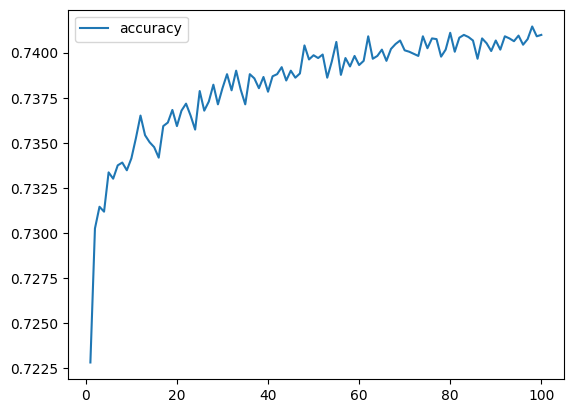

In [19]:
# View model's accuracy while training
history_accuracy2 = pd.DataFrame(fit_model2.history, index=range(1, len(fit_model2.history['accuracy'])+1))

# Plots the model's accuracy
history_accuracy2.plot(y='accuracy')

<Axes: >

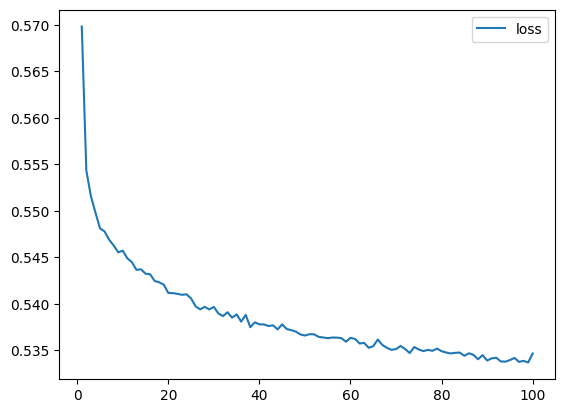

In [20]:
# View model's loss while training
history_loss2 = pd.DataFrame(fit_model2.history, index=range(1, len(fit_model2.history['loss'])+1))

# Plots the model's loss
history_loss2.plot(y='loss')

In [21]:
# Export our model to HDF5 file
nn_model2.save('./AlphabetSoupCharity.h5')